# Zad3 Jakub Kuciński

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
import scipy.stats
import multiprocessing
import classification

%matplotlib inline

In [4]:
def binary_random(p):
    if np.random.uniform(0, 1) < p:
        return 1
    return 0

In [5]:
def initial_probability_vector(d):
    return np.zeros(d) + 0.5

In [6]:
def random_individual(p, d):
    x = np.zeros(d)
    for i in range(d):
        x[i] = np.random.choice(2, p=[1-p[i], p[i]])
    return x

In [7]:
def random_population(p, d, N):
    pop = np.zeros((N, d))
    for k in range(N):
        pop[k, :] = random_individual(p, d)
    return pop

In [8]:
def population_evaluation(pop, F):
    res = np.zeros(pop.shape[0])
    for i in range(pop.shape[0]):
        res[i] = F(pop[i, :])
    return res

In [9]:
def pbil(F, d=100, N=100, Theta1=0.01, Theta2=0.05, Theta3=0.01, T=100, 
         verbose=False, targets=False, probabilities=False):
    if verbose:
        t0 = time.time()
    p = initial_probability_vector(d)
    pop = random_population(p, d, N)
    res = population_evaluation(pop, F)
    if targets:
        target = np.zeros(T)
    if probabilities:
        prob = np.zeros((T, d))
    for t in range(T):
        if verbose and t % 10 == 0:
            print(t, time.time() - t0)
        i = np.argmax(res)
        x = pop[i]
        if targets:
            target[t] = res[i]
            np.save('data/data-targets', target)
        if probabilities:
            prob[t, :] = p
            np.save('data/data-probs', prob)
        p = p * (1 - Theta1) + x * Theta1
        p = p.clip(0,1)
        is_mutation = np.random.rand(d) < Theta2
        p = p * (1 - is_mutation) + (is_mutation * (p * (1 - Theta3) + (np.random.rand(d) < 0.5) * Theta3))
        p = p.clip(0,1)
        pop = random_population(p, d, N)
        res = population_evaluation(pop, F)
    if verbose:
        print(time.time() - t0)
    if targets and probabilities:
        return p, target, prob
    if targets:
        return p, target
    if probabilities:
        return p, prob
    return p

In [10]:
data = np.loadtxt('ImageRawReduced.txt')
targets = np.loadtxt('ImageExpertReduced.txt')
rules = np.loadtxt('ClassificationRules.txt')
data.shape, targets.shape, rules.shape

((3, 9350), (9350,), (266, 9350))

In [11]:
rules1 = (rules == 1).astype(int)
rules2 = (rules == 2).astype(int)
rules3 = (rules == 3).astype(int)

In [12]:
def classify(x):
    rules_indices = np.where(x == 1)
    values_of_rules = rules[rules_indices, :][0]
    return np.sum(scipy.stats.mode(values_of_rules, axis=0)[0][0] == targets)

In [13]:
def classify2(x):
    w1 = (rules1 * x.reshape(-1, 1)).sum(axis=0)
    w2 = (rules2 * x.reshape(-1, 1)).sum(axis=0)
    w3 = (rules3 * x.reshape(-1, 1)).sum(axis=0)
    return np.sum(np.stack((w1, w2, w3)).argmax(axis=0)+1 == targets)

In [14]:
def plot_results(target, prob):
    plt.figure()
    plt.plot(target)
    plt.show()
    plt.figure()
    plt.plot(prob)
    plt.show()

In [77]:
p, target, prob = pbil(classify, d=266, N=50, T=1000, Theta1=0.02, Theta2=0.02, Theta3=0.02, verbose=True, targets=True, probabilities=True)

0 11.664450883865356
10 127.02309441566467
20 242.7141239643097
30 360.77855372428894
40 474.6032521724701
50 588.7203595638275
60 703.4896988868713
70 819.5203719139099
80 933.3683779239655
90 1057.6500248908997
100 1182.1802661418915
110 1301.4289050102234
120 1414.883691072464
130 1528.4184350967407
140 1642.3918209075928
150 1756.9222061634064
160 1872.1569933891296
170 1986.7384366989136
180 2100.7870264053345
190 2215.03657078743
200 2329.2182676792145
210 2443.8677911758423
220 2558.4062695503235
230 2671.6967265605927
240 2786.988700389862
250 2901.4669246673584
260 3016.352446079254
270 3130.450628757477
280 3247.427064180374
290 3363.105270385742
300 3479.819850206375
310 3595.9946734905243
320 3711.6646571159363
330 3827.884178876877
340 3943.0372445583344
350 4057.613862514496
360 4170.916112422943
370 4284.776783466339
380 4398.433345556259
390 4512.0445721149445
400 4625.726242303848
410 4739.851460933685
420 4854.405758142471
430 4969.382830381393
440 5085.052664279938
4

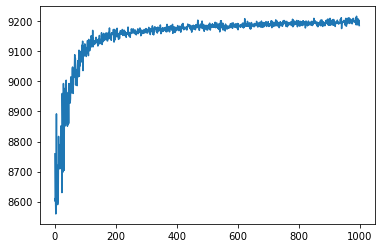

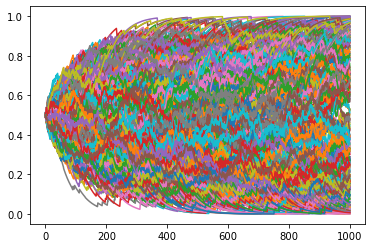

In [78]:
plot_results(target, prob)

In [80]:
target[-1]/9350

0.9824598930481283

In [12]:
p, target, prob = pbil(classify, d=266, N=50, T=1000, Theta1=0.05, Theta2=0.05, Theta3=0.05, verbose=True, targets=True, probabilities=True)

0 12.099847793579102
10 129.65552711486816
20 244.94971179962158
30 361.94940280914307
40 476.6709792613983
50 592.8793783187866
60 709.7210414409637
70 823.5486133098602
80 939.35333776474
90 1052.1381912231445
100 1164.8299689292908
110 1278.9732019901276
120 1394.6855216026306
130 1510.7599177360535
140 1626.0836346149445
150 1741.4984521865845
160 1859.3699712753296
170 1976.6688675880432
180 2095.571580886841
190 2212.410346508026
200 2328.9772086143494
210 2444.972996711731
220 2563.145943403244
230 2680.085655927658
240 2797.3359231948853
250 2913.860541820526
260 3027.5457968711853
270 3143.114506483078
280 3258.085050344467
290 3370.4248328208923
300 3483.562728404999
310 3597.4584498405457
320 3710.0257682800293
330 3822.02454161644
340 3936.363901615143
350 4048.836604118347
360 4163.8939707279205
370 4282.515278816223
380 4399.343687534332
390 4515.673384666443
400 4635.0282781124115
410 4750.813893318176
420 4865.5027668476105
430 4979.21150302887
440 5092.654217243195
450

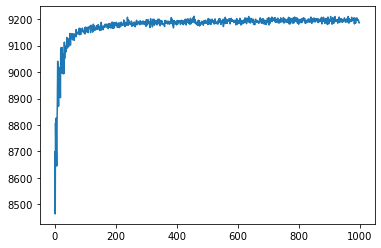

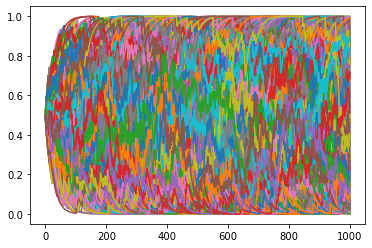

In [13]:
plot_results(target, prob)

In [14]:
target[-1]/9350

0.9824598930481283

In [15]:
p, target, prob = pbil(classify, d=266, N=50, T=1000, Theta1=0.05, Theta2=0.03, Theta3=0.02, verbose=True, targets=True, probabilities=True)

0 11.81455373764038
10 127.54395079612732
20 245.49539184570312
30 362.2150979042053
40 479.2694432735443
50 597.6850514411926
60 716.4374558925629
70 832.8027741909027
80 949.0291459560394
90 1064.5978996753693
100 1183.4757227897644
110 1300.4483206272125
120 1416.8330755233765
130 1531.3289737701416
140 1646.766606092453
150 1763.4315960407257
160 1878.21928024292
170 1994.5926604270935
180 2111.5304193496704
190 2226.551039457321
200 2339.629029273987
210 2453.0912504196167
220 2566.7128133773804
230 2681.4146978855133
240 2797.409631729126
250 2912.7633197307587
260 3028.332191467285
270 3142.9588329792023
280 3257.9885890483856
290 3372.7643151283264
300 3487.5458793640137
310 3601.514416694641
320 3717.222617149353
330 3831.831456422806
340 3945.2579872608185
350 4060.752279996872
360 4175.425985574722
370 4290.673942804337
380 4404.714512586594
390 4518.629239320755
400 4633.506696224213
410 4751.17417883873
420 4867.3851363658905
430 4981.181953430176
440 5096.647813796997
450

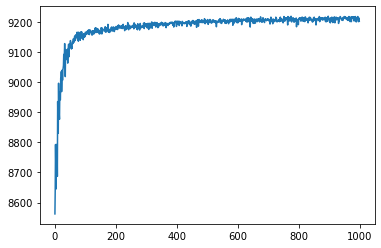

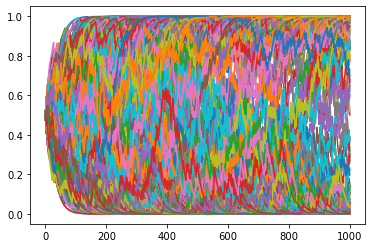

In [16]:
plot_results(target, prob)

In [17]:
target[-1]/9350

0.9842780748663101

In [46]:
p, target, prob = pbil(classify2, d=266, N=50, T=1000, Theta1=0.05, Theta2=0.01, Theta3=0.05, verbose=True, targets=True, probabilities=True)

0 1.981799840927124
10 21.650460958480835
20 41.34320664405823
30 60.47793984413147
40 80.14254546165466
50 100.27230930328369
60 120.12051916122437
70 140.23997378349304
80 160.68510818481445
90 181.2996609210968
100 201.27679204940796
110 221.44486045837402
120 241.66306972503662
130 261.6234791278839
140 281.7743983268738
150 302.1553819179535
160 322.379691362381
170 342.46675848960876
180 362.66759061813354
190 382.92020750045776
200 403.3029713630676
210 423.462286233902
220 443.6449987888336
230 463.64710211753845
240 483.97407150268555
250 504.6029016971588
260 525.3891830444336
270 546.4750556945801
280 567.4449503421783
290 588.0718421936035
300 608.2523560523987
310 628.4713099002838
320 648.670891046524
330 668.7737395763397
340 689.0490918159485
350 709.0711061954498
360 729.088701248169
370 749.1029555797577
380 769.2539851665497
390 789.439017534256
400 809.6061227321625
410 829.7296929359436
420 849.8570754528046
430 870.0527873039246
440 890.3935401439667
450 910.62367

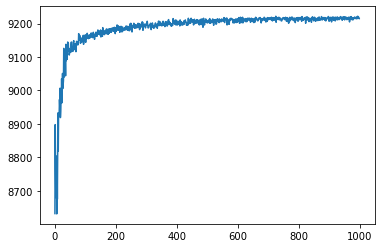

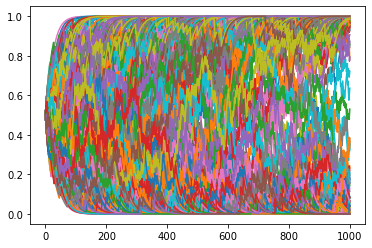

In [47]:
plot_results(target, prob)

In [48]:
target[-1]/9350

0.9855614973262032

In [12]:
p, target, prob = pbil(classify2, d=266, N=100, T=1000, Theta1=0.05, Theta2=0.01, Theta3=0.05, verbose=True, targets=True, probabilities=True)

0 4.179622650146484
10 46.69762372970581
20 90.88396716117859
30 135.7548794746399
40 183.1099145412445
50 231.70614552497864
60 278.558144569397
70 325.45640993118286
80 372.4003715515137
90 419.61690855026245
100 466.45690155029297
110 513.434773683548
120 560.4536638259888
130 607.4116489887238
140 654.8515207767487
150 701.7445669174194
160 749.1105027198792
170 796.3443081378937
180 843.6043074131012
190 890.7605571746826
200 938.0218601226807
210 984.0990538597107
220 1029.578490972519
230 1074.80996966362
240 1120.2593429088593
250 1165.6589052677155
260 1211.7526805400848
270 1260.9869604110718
280 1311.0235214233398
290 1357.2123847007751
300 1404.335529088974
310 1449.1404132843018
320 1494.1794505119324
330 1539.7213122844696
340 1584.6621897220612
350 1629.6124300956726
360 1675.318431854248
370 1720.5382332801819
380 1767.5823111534119
390 1819.0578889846802
400 1865.269591808319
410 1909.818903207779
420 1960.503982782364
430 2011.5619316101074
440 2056.642633676529
450 2

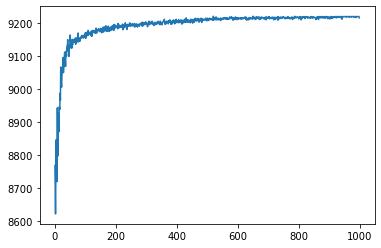

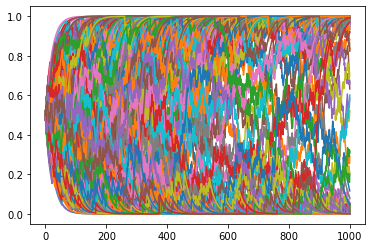

In [15]:
plot_results(target, prob)

In [16]:
target[-1]/9350

0.9857754010695187

In [16]:
p, target, prob = pbil(classify2, d=266, N=100, T=1000, Theta1=0.1, Theta2=0.01, Theta3=0.1, verbose=True, targets=True, probabilities=True)

0 4.298058986663818
10 46.104326009750366
20 87.00870776176453
30 128.89261388778687
40 169.39476203918457
50 209.8674600124359
60 250.4183566570282
70 291.19765305519104
80 332.7842094898224
90 375.21743059158325
100 416.3170611858368
110 456.8971428871155
120 497.6172385215759
130 538.2293434143066
140 578.8390562534332
150 619.4807884693146
160 663.4172098636627
170 708.01669049263
180 748.9911301136017
190 789.5965764522552
200 830.1425306797028
210 870.612667798996
220 911.1592216491699
230 951.6707832813263
240 992.1897492408752
250 1032.5730414390564
260 1073.1563432216644
270 1113.533521413803
280 1156.097758769989
290 1199.5375204086304
300 1241.5961046218872
310 1282.450999736786
320 1322.9359138011932
330 1363.6778173446655
340 1403.9983313083649
350 1444.5388624668121
360 1486.7257845401764
370 1530.895495891571
380 1574.3252964019775
390 1618.3057315349579
400 1662.3906078338623
410 1705.8454253673553
420 1749.8881301879883
430 1793.7054584026337
440 1837.3549218177795
450

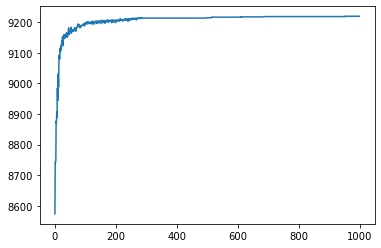

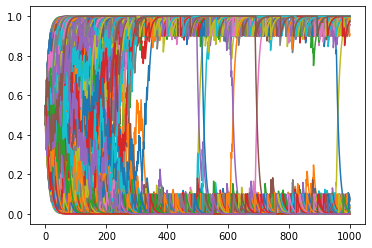

In [17]:
plot_results(target, prob)

In [18]:
target[-1]/9350

0.986096256684492

In [19]:
p, target, prob = pbil(classify2, d=266, N=100, T=1000, Theta1=0.08, Theta2=0.01, Theta3=0.08, verbose=True, targets=True, probabilities=True)

0 4.2368316650390625
10 45.26742768287659
20 85.8202977180481
30 127.74713230133057
40 176.25337195396423
50 223.3765218257904
60 266.0977063179016
70 310.47308468818665
80 352.0565176010132
90 395.79525327682495
100 436.32662892341614
110 476.7095022201538
120 516.9329342842102
130 557.2584543228149
140 597.5731408596039
150 637.9397032260895
160 678.5375611782074
170 719.1300623416901
180 760.0036046504974
190 800.3838951587677
200 840.7456958293915
210 881.1341223716736
220 921.3527295589447
230 961.6823661327362
240 1002.1021645069122
250 1042.9321842193604
260 1083.1699657440186
270 1123.4720523357391
280 1163.670879125595
290 1203.7628214359283
300 1243.903264284134
310 1284.1950223445892
320 1324.6636235713959
330 1364.6631824970245
340 1404.9334938526154
350 1444.8703317642212
360 1485.0274500846863
370 1525.1890568733215
380 1565.3931891918182
390 1605.8834969997406
400 1646.7128410339355
410 1686.891058921814
420 1727.2011830806732
430 1767.2332956790924
440 1807.503024339676

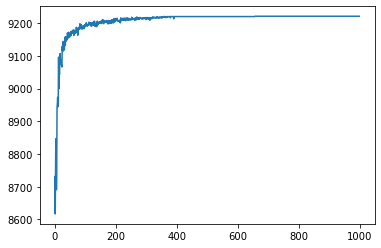

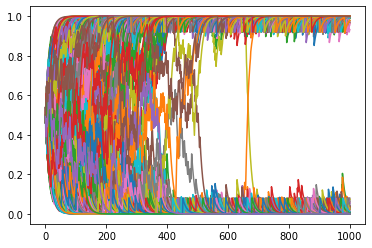

In [20]:
plot_results(target, prob)

In [21]:
target[-1]/9350

0.9862032085561497